In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-10-0.5_AR1.e-1_VG0_OL0\\KLD.csv'
df_KLD = pd.read_csv(filename)

In [3]:
boundaries = 150 + np.arange(10) * 150

### *Plot the KL divergence.*

Text(0.15, 0.9, '(a)')

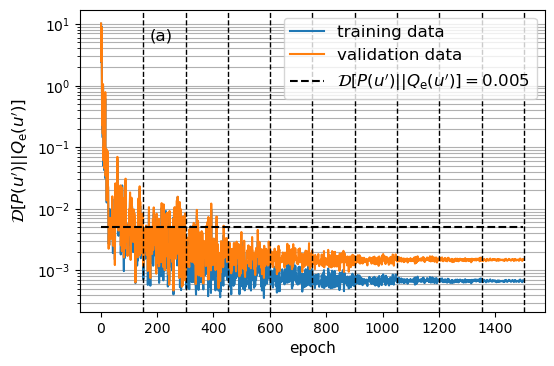

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]$', fontsize=12)

plt.plot(df_KLD.index+1, df_KLD['KLD_train'], label='training data')
plt.plot(df_KLD.index+1, df_KLD['KLD_dev'], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([1,1500], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

plt.grid(which='both', axis='y')
plt.legend(loc='upper right', fontsize='large')

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(a)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.15, 0.9, '(b)')

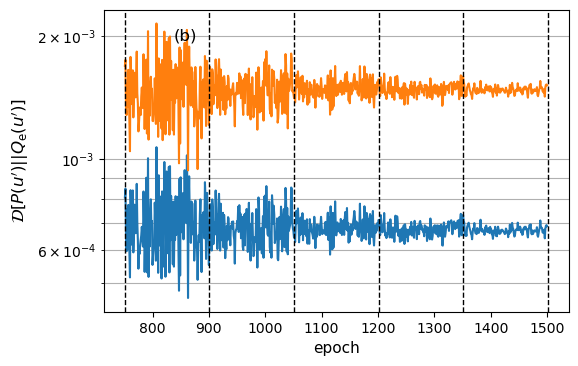

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]$', fontsize=12)

plt.plot(df_KLD.index[750:]+1, df_KLD['KLD_train'][750:], label='training data')
plt.plot(df_KLD.index[750:]+1, df_KLD['KLD_dev'][750:], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
#plt.plot([751,1500], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

plt.grid(which='both', axis='y')

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries[4:]:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(b)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

### *Calculate the mean and standard deviation of the KL divergence over different epoch ranges.*

In [6]:
edges = range(0, 1650, 150)

In [7]:
KLD_train_mean, KLD_train_std = [], []
for i in range(len(edges)-1):
    KLD_train_mean.append( np.mean(df_KLD['KLD_train'][ edges[i]:edges[i+1] ]) )
    KLD_train_std.append( np.std(df_KLD['KLD_train'][ edges[i]:edges[i+1] ]) )

KLD_dev_mean, KLD_dev_std = [], []
for i in range(len(edges)-1):
    KLD_dev_mean.append( np.mean(df_KLD['KLD_dev'][ edges[i]:edges[i+1] ]) )
    KLD_dev_std.append( np.std(df_KLD['KLD_dev'][ edges[i]:edges[i+1] ]) )

Text(0.12, 0.9, 'errorbar: $\\sigma(\\mathcal{D}[P(u^\\prime)||Q_{\\mathrm{e}}(u^\\prime)])$')

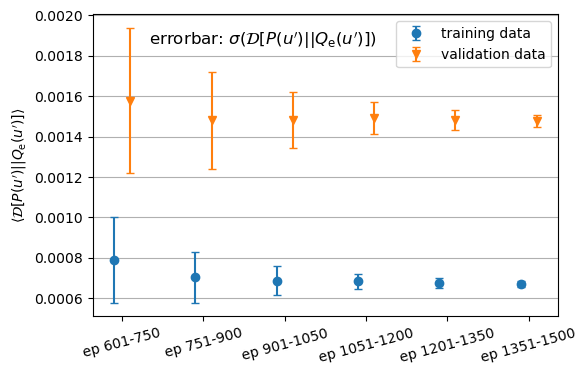

In [8]:
ticks = np.arange(len(edges)-1)
labels = ['ep 1-150', 'ep 151-300', 'ep 301-450', 'ep 451-600', 'ep 601-750', 'ep 751-900', 'ep 901-1050', 'ep 1051-1200', 'ep 1201-1350', 'ep 1351-1500']

plt.figure(figsize=(6,4), dpi=100)
plt.ylabel(r'$\langle\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]\rangle$')
plt.xticks(ticks, labels, rotation=15)

plt.errorbar(ticks[4:]-0.1, KLD_train_mean[4:], yerr=KLD_train_std[4:], fmt='o', capsize=3, label='training data')
plt.errorbar(ticks[4:]+0.1, KLD_dev_mean[4:], yerr=KLD_dev_std[4:], fmt='v', capsize=3, label='validation data')

plt.grid(axis='y')
plt.legend()

plt.annotate('errorbar: $\sigma(\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)])$', (0.12, 0.9), xycoords='axes fraction', fontsize=12)